In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import norm

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe

df=pd.read_csv('../input/netflix-shows/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
#Check shape of the dataset
df.shape

(7787, 12)

In [4]:
#Describe qualitative data 
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [5]:
#Check Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [6]:
# Check null data
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

>>### We have some null data need Fill it

In [7]:
# Process for NaN data
#filling director which didn't have any data by add No Director
df.director.fillna("No Director", inplace=True)

#filling cast which didn't have any data by add No Cast
df.cast.fillna("No Cast", inplace=True)

#filling country which didn't have any data by add country unavailable
df.country.fillna("Country Unavailable", inplace=True)

#drop remain NaN data which we will not use in analysis
df.dropna(inplace=True)

In [8]:
#Check Null data again to confirm from our process
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [9]:
# convert time from string to datetime64
df['date_added'] = pd.to_datetime(df['date_added'])

# Extract month and day name and hour from Start Time after convert
df['added_month'] = df['date_added'].dt.month
df['added_day_name'] = df['date_added'].dt.day_name()
df['added_year'] = df['date_added'].dt.year

In [10]:
#Check Data information 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   show_id         7770 non-null   object        
 1   type            7770 non-null   object        
 2   title           7770 non-null   object        
 3   director        7770 non-null   object        
 4   cast            7770 non-null   object        
 5   country         7770 non-null   object        
 6   date_added      7770 non-null   datetime64[ns]
 7   release_year    7770 non-null   int64         
 8   rating          7770 non-null   object        
 9   duration        7770 non-null   object        
 10  listed_in       7770 non-null   object        
 11  description     7770 non-null   object        
 12  added_month     7770 non-null   int64         
 13  added_day_name  7770 non-null   object        
 14  added_year      7770 non-null   int64         
dtypes: d

>#### Check Duplicated data

In [11]:

df.duplicated().sum()

0

>>#### No duplicate data in our dataset

In [12]:
#Check first five rows from dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_month,added_day_name,added_year
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,Friday,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,Friday,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,Thursday,2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11,Thursday,2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,Wednesday,2020


In [13]:
# Creating 2 new Data frame one for moives and one for TV Show
df_movies=df.query("type=='Movie'")
df_tvshow=df.query("type=='TV Show'")
# Check Number of Movies and TV Show
print(df_movies.type.value_counts())
print(df_tvshow.type.value_counts())

Movie    5372
Name: type, dtype: int64
TV Show    2398
Name: type, dtype: int64


In [14]:
#check country with produced Movies and TV Show
df['country'].value_counts()

United States                    2546
India                             923
Country Unavailable               505
United Kingdom                    396
Japan                             224
                                 ... 
Russia, United States, China        1
Chile, Argentina                    1
Belgium, Netherlands                1
China, United Kingdom               1
France, United States, Canada       1
Name: country, Length: 682, dtype: int64

In [15]:
# Check Rating values
df.rating.value_counts()

TV-MA       2861
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [16]:
#create Dictionary for rating https://en.wikipedia.org/wiki/TV_Parental_Guidelines
rate_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

In [17]:
# create new column to add new rating acording to ages stage
df['target_ages'] = df['rating'].replace(rate_ages)
#Check unique values for new column
df['target_ages'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids'], dtype=object)

In [18]:
#Describe Data frame which have only Movies

df_movies.describe()

,release_year,added_month,added_year
count,5372.000000,5372.000000,5372.000000
mean,2012.918280,6.714073,2018.481571
std,9.667293,3.612923,1.379639
min,1942.000000,1.000000,2008.000000
25%,2012.000000,3.000000,2018.000000
50%,2016.000000,7.000000,2019.000000
75%,2018.000000,10.000000,2020.000000
max,2021.000000,12.000000,2021.000000


>>### Noted : from 2016 to 2020 around 50% from total Movies  released and from 2018 to 2020 added 50 % of moives on netflix from total movies of netflix

In [19]:
#Describe Data frame which have only TV Shows
df_tvshow.describe()

,release_year,added_month,added_year
count,2398.000000,2398.000000,2398.000000
mean,2016.213928,6.943703,2018.525021
std,5.660587,3.537710,1.405039
min,1925.000000,1.000000,2008.000000
25%,2015.000000,4.000000,2018.000000
50%,2018.000000,7.000000,2019.000000
75%,2019.000000,10.000000,2020.000000
max,2021.000000,12.000000,2021.000000


>>### Noted: from 2017 to 2020 around 50% from TV Shows released, and Netflix added 50% from Total tv show on netflix from 2018 to 2020 

In [20]:
#Check correlation coefficient  
df.corr()

,release_year,added_month,added_year
release_year,1.000000,-0.010113,0.100745
added_month,-0.010113,1.000000,-0.133257
added_year,0.100745,-0.133257,1.000000


### What is the structure of your dataset?

> the Row dataset 6234 rows and 12 columns

### What is/are the main feature(s) of interest in your dataset?
I'm most interested in figuring out
> What is the Country that has more production for Movies and TV shows?

> Type of content (Movies and TV shows), what type of content one is higher on Netflix?

> when did start Netflix to increase content?
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Rate of content according who care to watch content [Older Kids', 'Teens', 'Adults', 'Kids, 
>I expect that type of content will have the strongest effect on my investigation.
> Release years and add years to figure out at which years start to increase the content.


# *Univariate Exploration*



#  <span style="color:red">1.Which type more show Moives or TV Shows?</span>

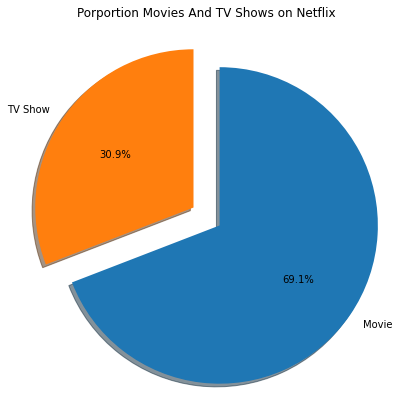

''

In [21]:
# Use the `color` argument
con=df['type'].value_counts()

# g = plt.pie(con,explode=(0.025,0.025), labels=df.type.value_counts().index, colors=[‘red’,’black’],autopct=’%1.1f%%’, startangle=180)
explode = (0, 0.2)  # only "explode" the 2nd slice (i.e. 'Hogs')
plt.figure(figsize=(12,7))

plt.pie(con,labels=con.index,startangle=90,autopct='%1.1f%%',counterclock=False,explode=explode,shadow=True,)
plt.title('Porportion Movies And TV Shows on Netflix')
plt.axis('square')
plt.show()
;

>>###  <span style="color:blue"> (68,4%) Movies and (31,6%) TV Shows,that means most of shows from the movies.</span>

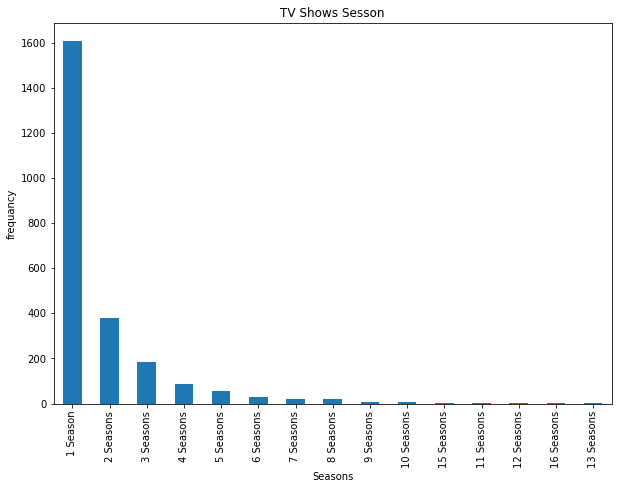

In [22]:
#Check most of Tv show how many season comman
plt.figure(figsize=(10,7))

df_tvshow.duration.value_counts().plot(kind='bar')
plt.xlabel('Seasons')
plt.ylabel('frequancy')
plt.title('TV Shows Sesson');


>>### <span style="color:blue">Most of TV Shows have one Season</span>

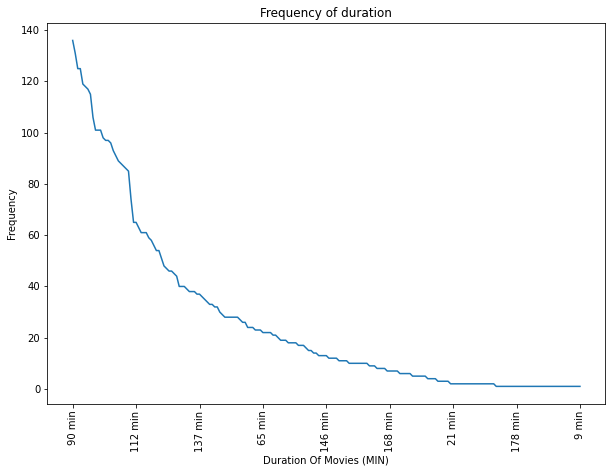

In [23]:
# Check most of the Movies  how many common movies have same duration ?
plt.figure(figsize=(10,7))
df_movies.duration.value_counts().plot()
plt.xticks(rotation=90);
plt.xlabel('Duration Of Movies (MIN)')
plt.ylabel('Frequency')
plt.title('Frequency of duration');

>>### <span style="color:blue">Most of Movies have 90 Min's duration</span>

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


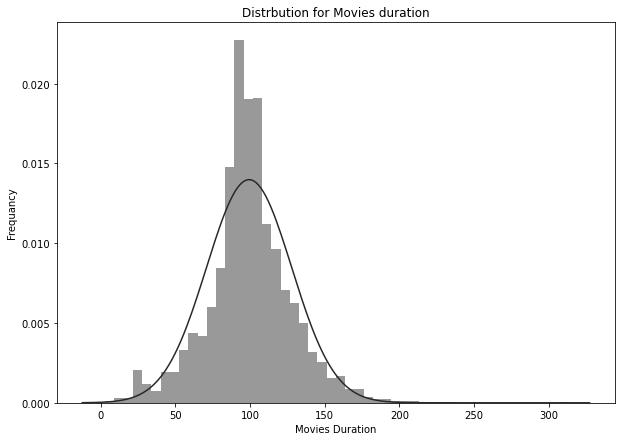

In [24]:
# extract number of time and make normal distribution for movies time almost average time 100 MIN's
plt.figure(figsize=(10,7))

sb.distplot(df_movies['duration'].str.extract('(\d+)'),fit=norm,kde=False,color=['k'])
plt.xlabel('Movies Duration')
plt.ylabel('Frequancy')
plt.title('Distrbution for Movies duration');


>>## <span style="color:blue">Most of the average duration for movies 100 Min's,Netflix shloud care about duration when add new movies.</span>

#  <span style="color:red">2.Which country has high production content of Netflix?</span> 

## We need to separate all countries before analyzing it.

In [25]:
all_countries = df.set_index('title').country.str.split(',', expand=True).stack().reset_index(level=1, drop=True);
all_countries

title
3%                                                      Brazil
7:19                                                    Mexico
23:59                                                Singapore
9                                                United States
21                                               United States
                                                  ...         
Zulu Man in Japan                          Country Unavailable
Zumbo's Just Desserts                                Australia
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS         United Kingdom
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS                 Canada
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS          United States
Length: 9557, dtype: object

### Removing titles with no countries available.

In [26]:
all_countries=all_countries[all_countries !='Country Unavailable']

## top Countries producted Movies and TV Shows

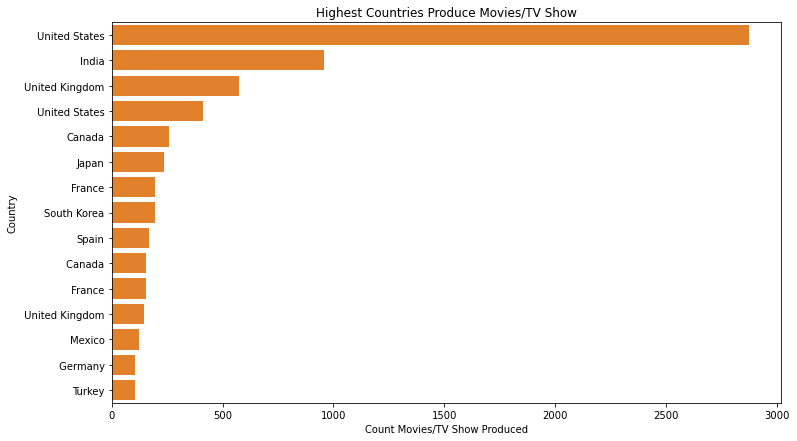

In [27]:
base_color = sb.color_palette()[1]
plt.figure(figsize=(12,7))

sb.countplot(y = all_countries, order=all_countries.value_counts().index[:15],color=base_color)
plt.xlabel('Count Movies/TV Show Produced')
plt.ylabel('Country')
plt.title('Highest Countries Produce Movies/TV Show')

plt.show()

>## <span style="color:blue">From the Horizontal bar chart we can see the United States, Inda, and the United Kingdom the highest 3 countries produce content on Netflix.</span>

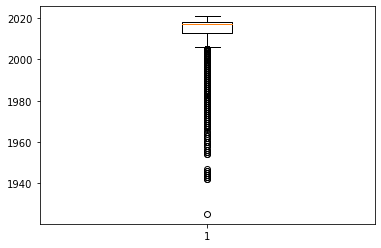

In [28]:
## Check 5 number summary and outlier for release years for movies and tv shows 
plt.boxplot(df['release_year']);


# Outliers data here is not erorr, it just recorded date for released content not anomalous or wrong data,beacuse it recorded from along time 

Text(0, 0.5, 'Count Movies/TV Show produced')

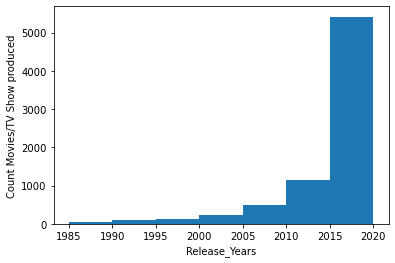

In [29]:
#Ploting Histogram to check data skewed

bins=np.arange(1985,2020+5,5)
plt.hist(df['release_year'],bins=bins);
plt.xlabel('Release_Years')
plt.ylabel('Count Movies/TV Show produced')

### <span style="color:blue">Left skewed Histogram for data  mean < median < mode  indcate increaseing content produce  from 1990 with high release  at 2019</span>

Text(0.5, 0, 'added_year')

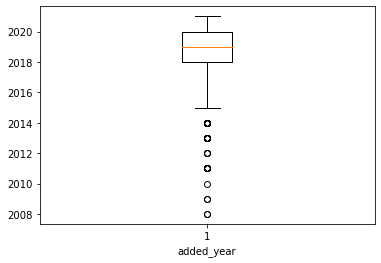

In [30]:
## Check 5 number summary and outlier for added years for movies and tv shows on Netflix

plt.boxplot(df['added_year']);
plt.xlabel('added_year')

>## <span style="color:blue">Same for Added_Year Outliers data here is not erorr, it just recorded date for added years  content on netflix, not anomalous or wrong data.</span>

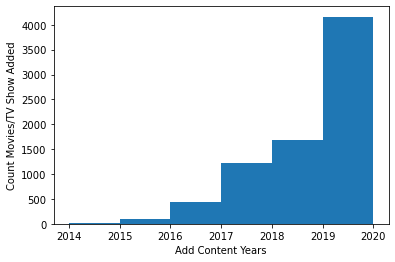

In [31]:
#Ploting Histogram to check data skewed
bins=np.arange(2014,2021,1)
plt.hist(df['added_year'],bins=bins);
plt.xlabel("Add Content Years")
plt.ylabel('Count Movies/TV Show Added');


>### <span style="color:blue">Left skewwed Histogram for data  mean < median < mode  indcate increaseing content added from 2015 with high added at 2019</span>

# *Bivariate Exploration*

## <span style="color:red">3.Which day of the week has high increasing content (Movies and TV Show)add?</span>

Text(0.5, 1.0, 'Relation Between Day and Type of content')

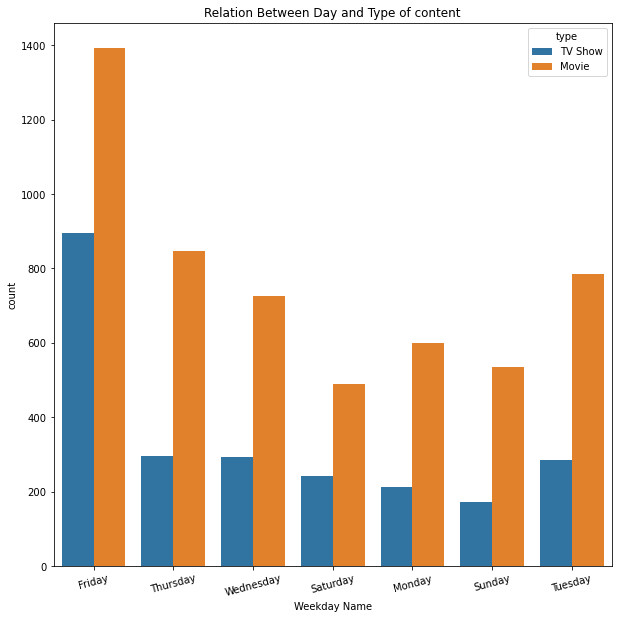

In [32]:
#Ploting seaborn countplot to Show the counts of observations in each categorical bin using bars.
fig, ax = plt.subplots(figsize=(10,10))

sb.countplot(data=df,x='added_day_name',hue='type',ax=ax)
plt.xticks(rotation=15);
plt.xlabel('Weekday Name')
plt.title('Relation Between Day and Type of content')


>>## <span style="color:blue">Highest day Friday for added movies and TV Show </span>

# <span style="color:red">4.Which type content rate highest for movies and tv show?</span>

<AxesSubplot:xlabel='target_ages', ylabel='count'>

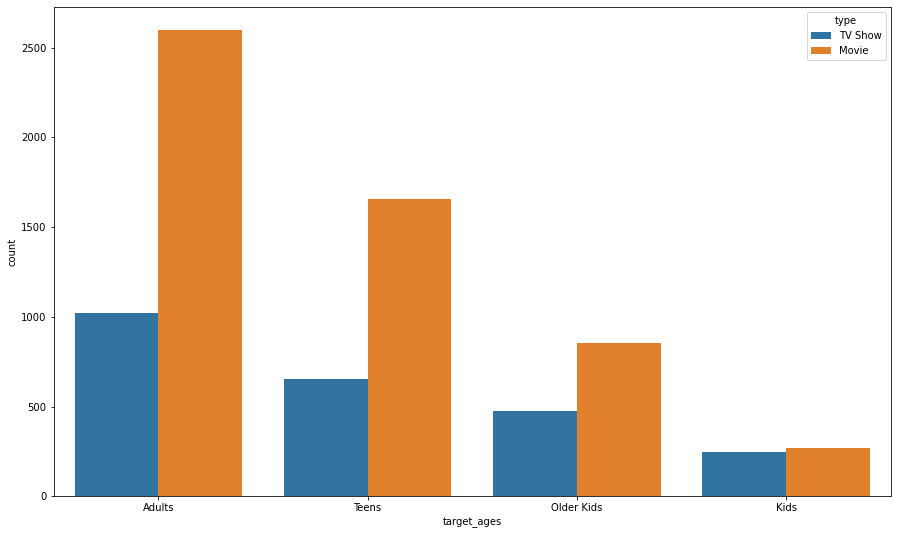

In [33]:
plt.figure(figsize=(15,9))
sb.countplot(data = df, x = 'target_ages', hue = 'type')
#plt.xticks(rotation = 20);

>>## <span style="color:blue">Adult Movies the highest rate for movies and for TV show the highest rate Adult and Teens rate.</span>

# <span style="color:red">5.What the highest year for release content Movies and TV Show?</spain>

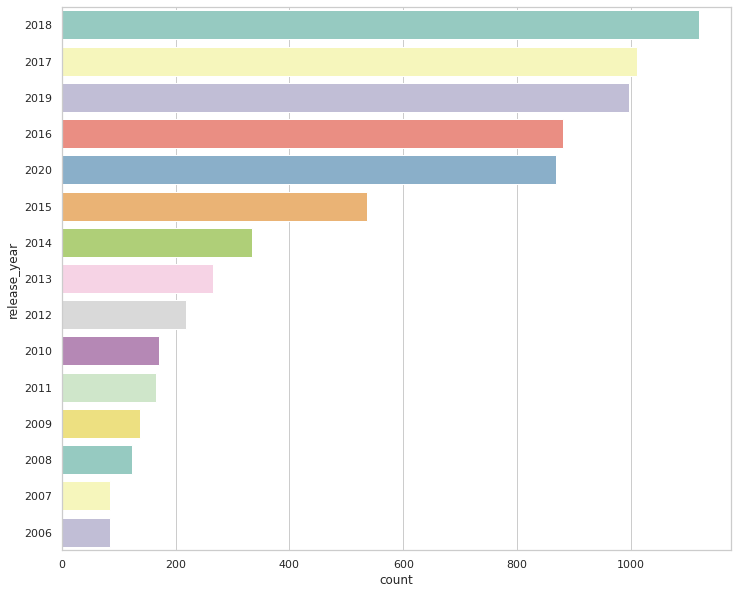

In [34]:
plt.figure(figsize=(12,10))
sb.set(style="whitegrid")

ax = sb.countplot(y='release_year', data=df, palette="Set3", order=df['release_year'].value_counts().index[0:15])

>>### <span style="color:blue">2018 the highest year for release content.</span>

# <span style="color:red">6.What the highest year for to added content on Netflix?</span>

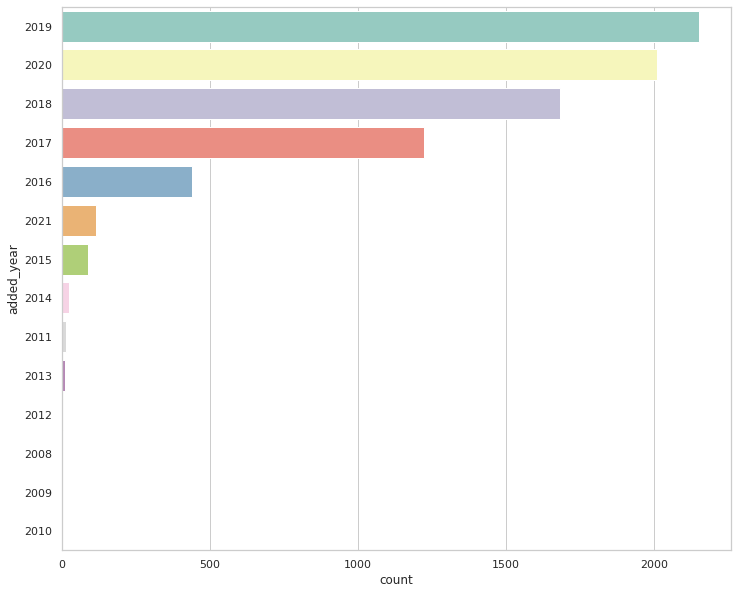

In [35]:
plt.figure(figsize=(12,10))

ax = sb.countplot(y='added_year', data=df, palette="Set3", order=df['added_year'].value_counts().index[0:15])


>>### 2019 highest years for add content in Netflex

# *Multivariate Exploration*

# <span style="color:red"> 7.What relation between released years and added years for Movies and TV Show on Netflix?</span>

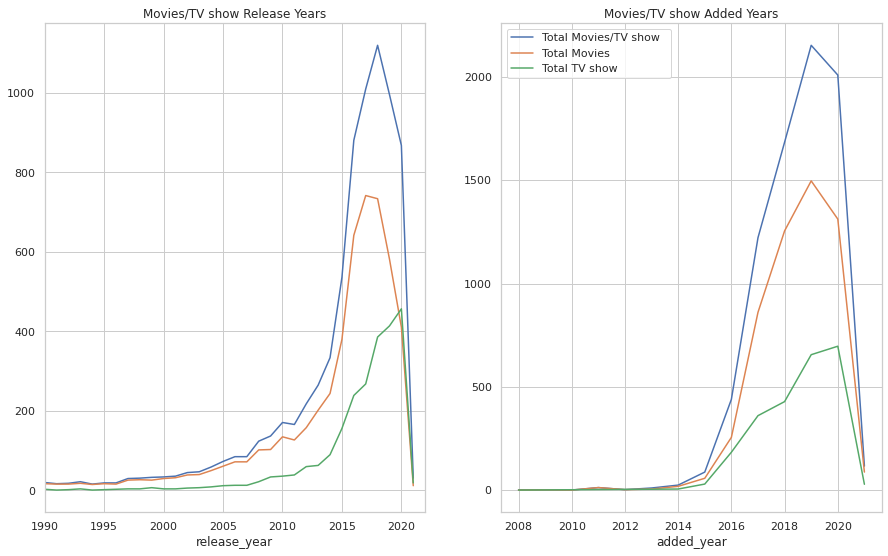

In [36]:
#Plotting line to get realtion between releasd movies and TVshow per year 
plt.figure(figsize=(15,9))
plt.subplot(1, 2, 1)

df.groupby('release_year')["type"].count().plot(label="Total Movies/TV show ")
df_movies.groupby('release_year')["type"].count().plot(label="Total Movies ")
df_tvshow.groupby('release_year')["type"].count().plot(label="Total TV show ")
plt.title("Movies/TV show Release Years")
plt.xlim([1990, 2022])

#Plotting line to get realtion between added  movies and TVshow on Netflix per year and correleting with release plot 

plt.subplot(1, 2, 2)
bins=np.arange(1970,2020,10)
df.groupby('added_year')["type"].count().plot(label="Total Movies/TV show  ")
df_movies.groupby('added_year')["type"].count().plot(label="Total Movies   ")
df_tvshow.groupby('added_year')["type"].count().plot(label="Total TV show  ")
plt.title("Movies/TV show Added Years")
plt.legend()


>>###  <span style="color:blue">Produce Movies and TV Show increased  from 2000 and got high peak at 2018, But Netflix added content increased from 2014, reached high peak 2019.</span>

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


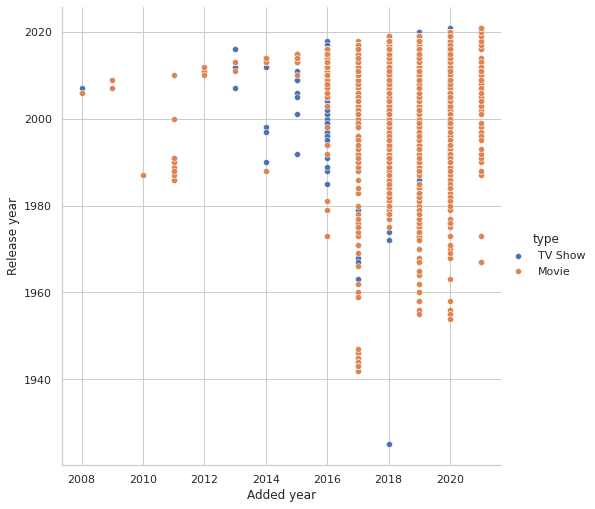

In [37]:
# Ploting scatter for release years and added years on netflex
g = sb.FacetGrid(df,hue="type",size=7)
g.map_dataframe(sb.scatterplot, x="added_year", y="release_year")
g.set_axis_labels('Added year','Release year')
g.add_legend();

>>### <span style="color:blue">Produce Movies and TV Show increased from 2000 and got high peak at 2018, But Netflix added content increased from 2014, reached high peak 2019.¶</span>

## <span style="color:brown">Conclustion from dataset</span>

> Most content watched by adults

> Movies content in Netflex more than TV SHows

> Most Tv Show has one season 

>Most of Mean time for movies 100 Min's

> Produce Movies and TV Show increased from 2000 and got high peak at 2018, But Netflix added content increased from 2014, reached high peak 2019.¶


